# Best-Practices Handbook - Skewness

### Description

Skewness is a measure that describes the shape of a (probability) distribution. Specifically, it's a measure of assymetry of the data points that form the distribution. Assymetric distributions can be left-skewed negative) or right-skewed (positive). A symmetric distribution has a skew of zero and is a normal distribution. 

A left-skewed distribution is characterised by a longer or fatter tail on the left side of the distribution, while a right-skewed distribution shows a longer of fatter tail on the right side of the distribution (Chen, 2024). 

Other than the visual inspection of the distribution or data histogram, one can also determine skewness by studying the mean and median of a distribution. When data has a right-skew (positive), the mean value is larger than the median value. The opposite is true for a left-skewed distribution where the mean value is smaller than the median value (Chen, 2021).

### Definition

There are two main methods for measuring skewness. Pearson's first skewness coeffcient measures the mode skewness, Pearson's second skewness coefficient measures the median skewness (Taylor, as of 2024). Which skewness we want to use depends on the data sample. If the data has a strong (as in clearly defined) mode, Pearson's first coefficient is preferred, but if the data has a weak or multiple modes, Pearson's second coefficient might be a better measure (Chen, 2024).

The formulas for both are below:
$$
\text{Pearson's first coefficient of skewness} = \frac{3*(\text{Mean} - \text{Median})}{\text{Standard Deviation}}
$$

$$
\text{Pearson's second coefficient of skewness} = \frac{(\text{Mean} - \text{Mode})}{\text{Standard Deviation}}
$$

...

### Demonstration & Diagram

In [13]:
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

In [14]:
bned = yf.download('BNED', start="2020-01-01")
bned.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,4.32,4.35,4.03,4.05,4.05,240700
2020-01-03,4.06,4.10,3.82,3.89,3.89,425700
2020-01-06,3.90,4.51,3.87,4.35,4.35,499900
2020-01-07,4.32,4.32,4.09,4.12,4.12,279800
2020-01-08,3.98,4.16,3.89,3.90,3.90,387700


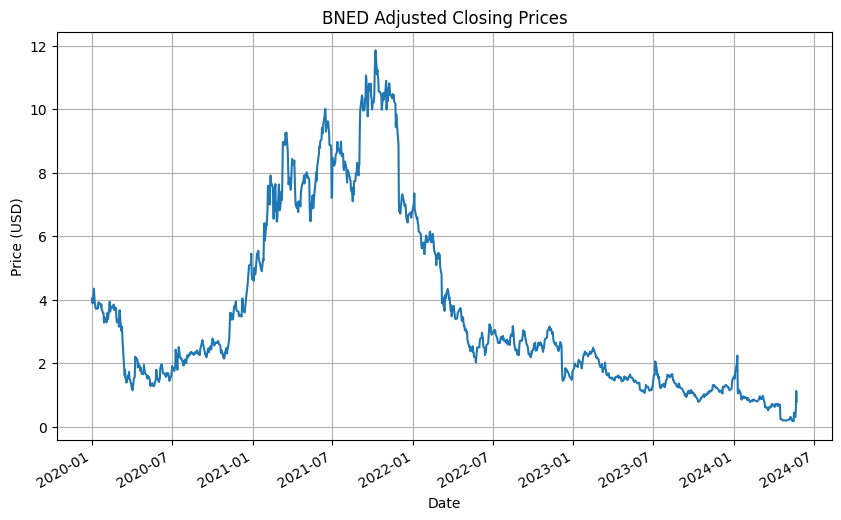

In [15]:
plt.figure(figsize=(10, 6))
bned['Adj Close'].plot()
plt.title('BNED Adjusted Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()

In [16]:
bned['Daily Return'] = bned['Adj Close'].pct_change()
bned.head()

,Open,High,Low,Close,Adj Close,Volume,Daily Return
Date,,,,,,,
2020-01-02,4.32,4.35,4.03,4.05,4.05,240700,NaN
2020-01-03,4.06,4.10,3.82,3.89,3.89,425700,-0.039506
2020-01-06,3.90,4.51,3.87,4.35,4.35,499900,0.118252
2020-01-07,4.32,4.32,4.09,4.12,4.12,279800,-0.052874
2020-01-08,3.98,4.16,3.89,3.90,3.90,387700,-0.053398


Text(0, 0.5, 'Frequency')

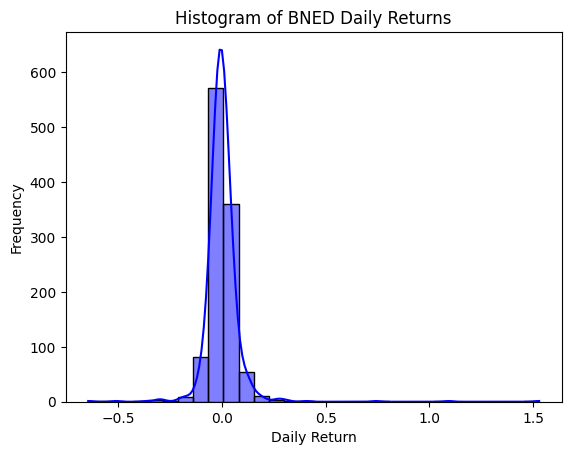

In [17]:
sns.histplot(bned['Daily Return'].dropna(), bins=30, kde=True, color='blue')
plt.title('Histogram of BNED Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')

### Diagnosis

There are multiple ways to assess whether skewness is present in a data sample. When looking at the histogram above, we see that there is more data concentrated on the left side of the distribution while the right-side tail is longer, indicating a right-skewed distribution.

(-0.04, 0.04)

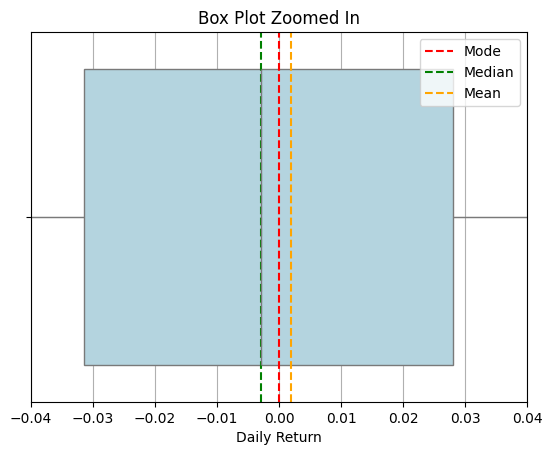

In [18]:
# Lets zoom in closer to where the returns are concentrated to get a better look at mean, median and mode

sns.boxplot(x=bned['Daily Return'], color='lightblue')

mode_val = bned['Daily Return'].mode().values[0]
median_val = bned['Daily Return'].median()
mean_val = bned['Daily Return'].mean()

plt.axvline(x=mode_val, color='red', linestyle='--', label='Mode')
plt.axvline(x=median_val, color='green', linestyle='--', label='Median')
plt.axvline(x=mean_val, color='orange', linestyle='--', label='Mean')

plt.title('Box Plot Zoomed In')
plt.xlabel('Daily Return')
plt.legend()
plt.grid(True)
plt.xlim(left=-0.04, right=0.04)

We see that the mean is larger than the median, further indicating that we are looking at a right-skewed distribution.

In [19]:
skewness = skew(bned['Daily Return'].dropna())
print("Skewness of Daily Returns:", round(skewness, 4))

Skewness of Daily Returns: 6.1748


Lastly, running the skewness calculation confirms that the stock price movements of BNED are positive and therefore right-skewed.

### Damage

Many statistical methods rely on an approximately normal distribution (Siegel and Wagner, 2022). Some examples of methods and tools that rely on an approximately normal distribution include hypothesis testing and regression-based models (Nguyen, 2021). When the normality assumption is ignored and a statistical method is used on skewed data, it can lead to misleading or incorrect outputs because the analysis does not make the best use of all the ifnormation in the dataset (Siegel and Wagner, 2022).

### Directions

Skewness can be dealt with by transforming the underlying dataset (Siegel and Wagner, 2022). The transformation depends on the dataset at hand, most commonly a power transformation is used, e.g. logarithmic transformation to turn (approximately) lognormally distributed data into near-normally distributed data (Feng et al., 2014). This transformation would be useful in an event where a scatter plot of the independent variable (x) and dependent variable (y) follow a log-like function. Each variable x would then be replaced with log(x), ln(x) or log with base other than 10 can be used as required. If successful, the scatter plot of x and y will be closer to a straight line than before. The transformed values can then be further used for the required statistical method without skewness impacting the final results.

### References
1. Chen, James. "Right Skewed vs. Left Skewed Distribution.", 6 Mar. 2024, www.investopedia.com/terms/s/skewness.asp#:~:text=Skewness%20is%20the%20degree%20of,or%20negative%20and%20left%2Dskewed.
2. Taylor, Sebastian. "Skewness - A measure of the deviation of a random variable's given distribution from the normal distribution.", corporatefinanceinstitute.com/resources/data-science/skewness/.
3. Siegel, Andrew F. and Wagner, Michael R. Practical Business Statistics (Eighth Edition), 2022, Chapter 3.4.
4. Nguyen, Duy Lam. "Definition, Problem and Reducing Methods.", 10 Feb. 2021, lamduy-nguyen.medium.com/skewness-definition-problem-and-reducing-methods-a5ee25a8b6ca.
5. Feng, Changyong et al. "Log-transformation and its implications for data analysis.", Shanghai Arch Psychiatry, Apr. 2014; 26(2): 105–109.